# Predict-Type of Glass:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("GlassIdentificationx.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Understanding the data & Exploring the features:

In [5]:
#To see first few records from the dataset
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
#To see last few records from the dataset
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
#To check the shape and columns of the dataset
print("The dimension of the dataset",df.shape)
print("The column headers of the dataset",df.columns)

The dimension of the dataset (213, 10)
The column headers of the dataset Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')


In [8]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [9]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There is no null values in the dataset so we donot perform "Noise Handling". 

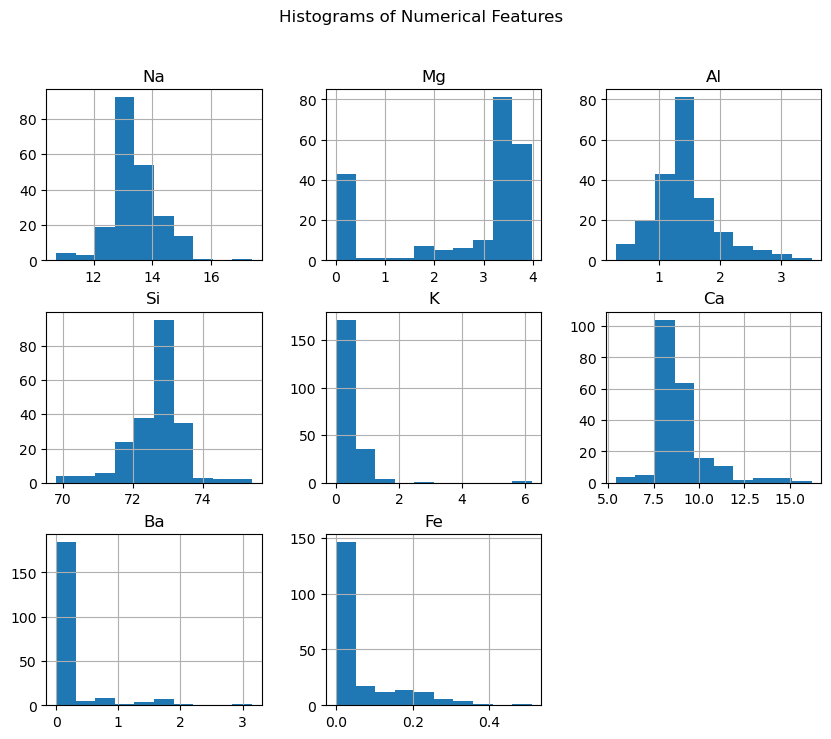

In [11]:
# Histograms of numerical features
df.drop(['RI', 'Type of glass'], axis=1).hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

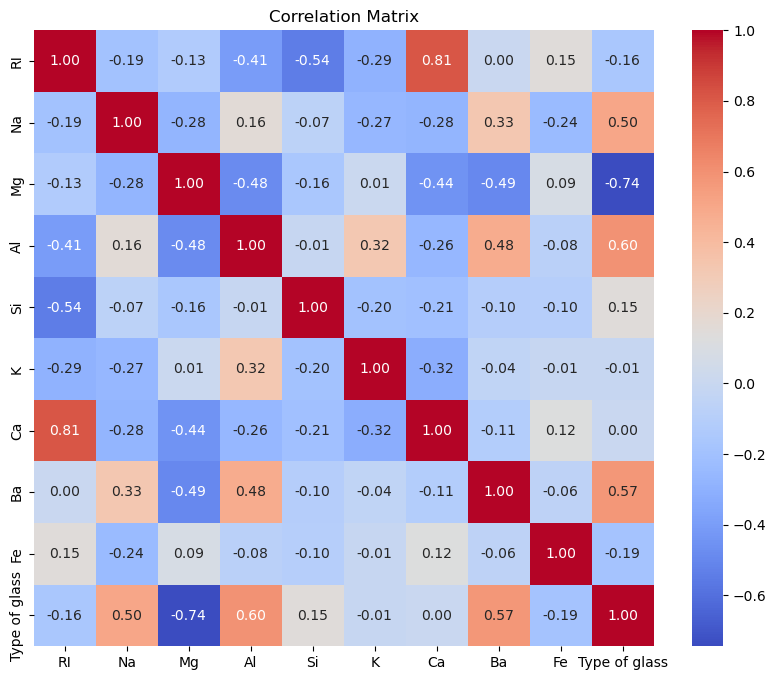

In [12]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Data preprocessing:

In [13]:
df.drop('RI', axis=1, inplace=True)  # Drop the ID column
X = df.drop('Type of glass', axis=1)
y = df['Type of glass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Here "Id Number" column was drop for better visualization and prediction.

In [14]:
# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Model evaluation
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.67      0.80      0.73        15
           3       1.00      0.33      0.50         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.74        43
   macro avg       0.84      0.71      0.74        43
weighted avg       0.78      0.74      0.74        43

Confusion Matrix:
[[ 7  3  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]


# Prediction:- Type of Glass

In [16]:
# Ensure column names and data types match X_train
new_sample = pd.DataFrame({
    'RI': [1.51742],
    'Na': [13.14],
    'Mg': [3.76],
    'Al': [1.17],
    'Si': [72.73],
    'K': [0.56],
    'Ca': [8.88],
    'Ba': [0.0],
    'Fe': [0.17]
}, columns=X_train.columns)  # Use the same columns as X_train

# Convert data types if needed
new_sample = new_sample.astype(float)  # Convert to float if necessary

# Make prediction
predicted_glass_type = rf_model.predict(new_sample)
print("Predicted Glass Type:", predicted_glass_type[0])

Predicted Glass Type: 2
